# Benchmarking Dimensionality Reduction Algorithms on Human Genome

## Importing Libraries

In [14]:
from script.preprocessing import load_data, make_plot_ready
from script.pca import perform_PCA
from script.umap import perform_UMAP
from script.tsne import perform_TSNE
from script.MDS import perform_MDS
from script.isomap import perform_Isomap
from script.plotting import PlotClusters

## Loading Data

In [2]:
data, genotypes = load_data("1kg_chr16_pca_recode.raw")
# returns a numpy object

## PCA

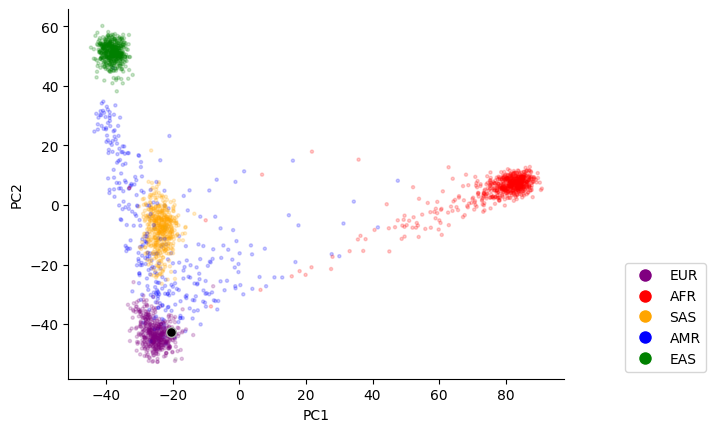

In [3]:
prefix = "PC"
n_components = 10
pcs = perform_PCA(genotypes, n_components)
pca_df = make_plot_ready(data, pcs, n_components, prefix)
PlotClusters(pca_df, 1, 2, prefix, "superpop", ["mgymrek"])

## UMAP

d:\softwares\AnacondaMini\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


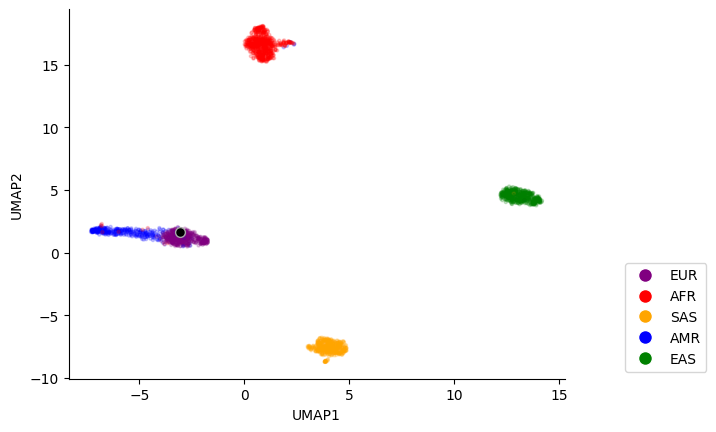

In [5]:
prefix = "UMAP"
n_components = 2
pcs = perform_UMAP(genotypes)
umap_df = make_plot_ready(data, pcs.T, n_components, prefix)
PlotClusters(umap_df, 1, 2, prefix, "superpop", ["mgymrek"])

## TSNE

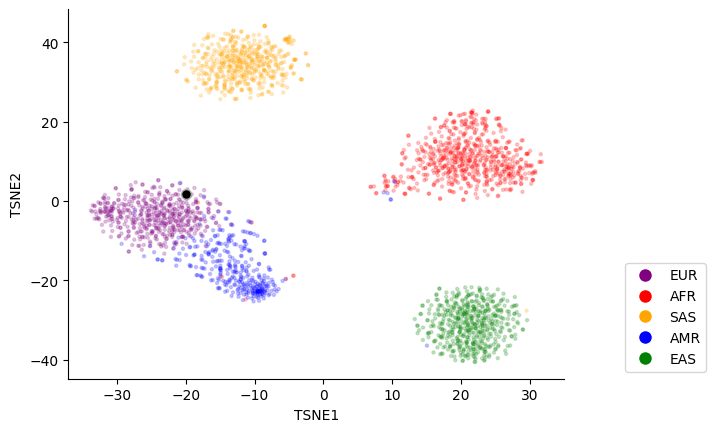

In [9]:
prefix = "TSNE"
n_components = 2
pcs = perform_TSNE(genotypes, n_components)
tsne_df = make_plot_ready(data, pcs.T, n_components, prefix)
PlotClusters(tsne_df, 1, 2, prefix, "superpop", ["mgymrek"])

## MDS

d:\softwares\AnacondaMini\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


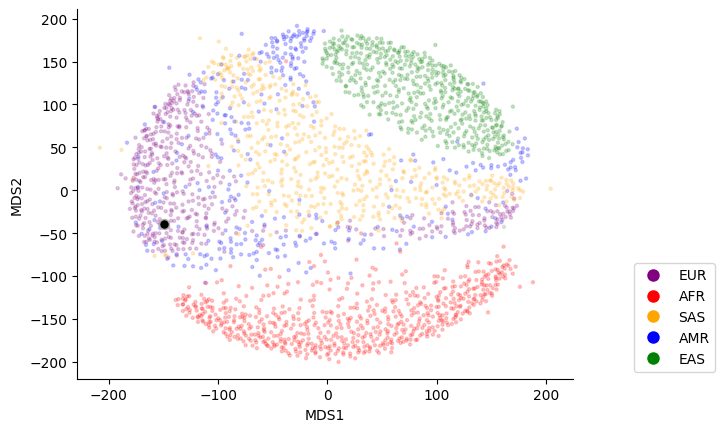

In [12]:
prefix = "MDS"
n_components = 2
pcs = perform_MDS(genotypes, n_components)
mds_df = make_plot_ready(data, pcs.T, n_components, prefix)
PlotClusters(mds_df, 1, 2, prefix, "superpop", ["mgymrek"])

## Isomap

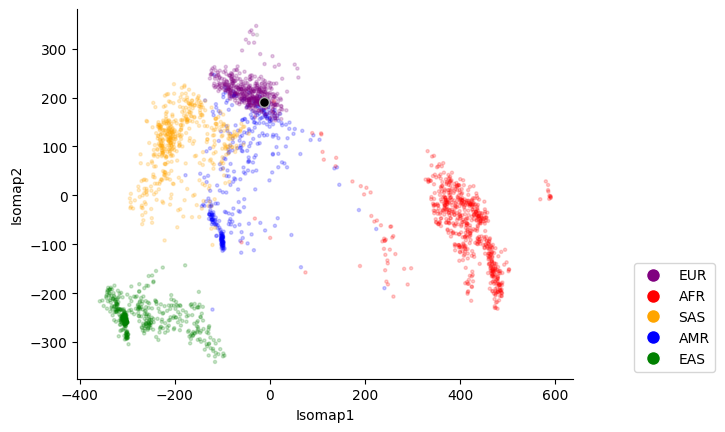

In [15]:
prefix = "Isomap"
n_components = 2
pcs = perform_Isomap(genotypes, n_components)
isomap_df = make_plot_ready(data, pcs.T, n_components, prefix)
PlotClusters(isomap_df, 1, 2, prefix, "superpop", ["mgymrek"])